
# Customer Transaction Prediction
**Capstone Project – PRCP-1003**  
**Domain:** Banking  
**Technique:** Supervised Machine Learning (Binary Classification)

## Problem Statement

The objective of this project is to predict whether a customer will make a transaction in the future based on anonymized numerical features.

### Tasks:
1. Perform data analysis on the given dataset.
2. Build a predictive model to identify customers likely to make transactions.
3. Handle class imbalance appropriately.
4. Evaluate and compare models using suitable metrics.


## Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")


## Loading the Dataset


In [2]:
data = pd.read_csv("data.csv")
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## Dataset Overview


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
# top 5 rows
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# Bottom 5 rows
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
data.shape

(200000, 202)

## Data Understanding & Analysis Report

In [7]:
data.isnull()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

### Target Variable Distribution


In [9]:
data['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

Target variable is imbalanced so we need to balance the target 

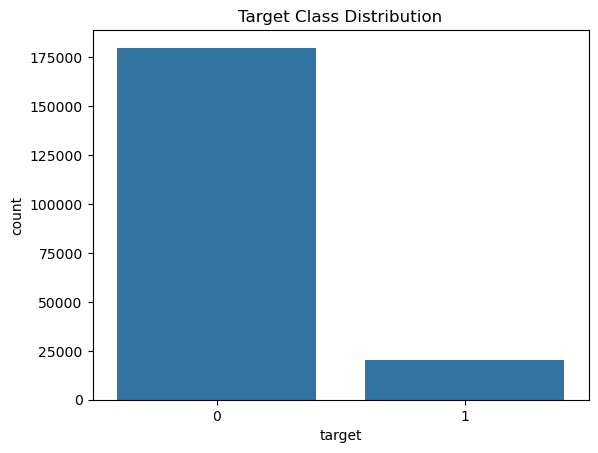

In [10]:
sns.countplot(x='target', data=data)
plt.title("Target Class Distribution")
plt.show()

The plot shows a highly imbalanced target distribution, where class 0 (no transaction) dominates the dataset, while class 1 (transaction) represents a much smaller proportion.
This imbalance justifies the use of techniques like SMOTE and evaluation metrics such as recall and ROC-AUC instead of accuracy.

## Feature and Target Separation


In [11]:
X = data.drop(columns=['ID_code', 'target'])
y = data['target']

## Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Feature Scaling


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
X_train_scaled


array([[ 1.55527004, -0.11525565, -0.09088068, ...,  0.04686222,
        -0.83703878, -1.21708255],
       [ 0.54978094, -1.61339597,  0.40077456, ..., -0.72278067,
        -1.69788529, -0.01119958],
       [-0.41853361, -1.72371245, -1.32179467, ...,  0.59730508,
         0.66648063, -1.02156661],
       ...,
       [ 0.21395995,  0.7198001 ,  1.2994094 , ..., -2.31233371,
        -0.92302719,  0.25785774],
       [-2.37536198,  0.3403865 , -2.40493247, ...,  0.79641991,
        -0.50533128,  0.7542021 ],
       [-0.6892498 ,  0.2017375 ,  0.11776674, ...,  1.41971231,
         1.20268854,  1.60262663]], shape=(160000, 200))

In [15]:
X_test_scaled

array([[-0.62858622,  2.08121814, -0.53874339, ..., -1.06325184,
         0.57574643, -0.39108186],
       [-1.03211093, -1.68992093,  1.79280274, ...,  0.39091615,
        -1.2159055 ,  0.44398807],
       [-1.59486111, -1.3049001 , -0.96688246, ..., -0.22879349,
         0.92467816,  1.4210405 ],
       ...,
       [-2.0287834 ,  1.36440801, -1.22291196, ..., -2.36205814,
        -0.0133621 ,  0.10635541],
       [-0.60670916,  1.22069523, -0.88704327, ...,  0.63378413,
        -0.30899496, -0.60425693],
       [-0.48469113,  0.19529043,  0.7796423 , ..., -1.8464658 ,
        -0.49116029, -0.02963525]], shape=(40000, 200))

## Handling Class Imbalance Using SMOTE

SMOTE (Synthetic Minority Oversampling Technique) is applied only on the training dataset to balance the target classes.


In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

In [17]:
pd.Series(y_train_smote).value_counts()


target
0    143922
1    143922
Name: count, dtype: int64

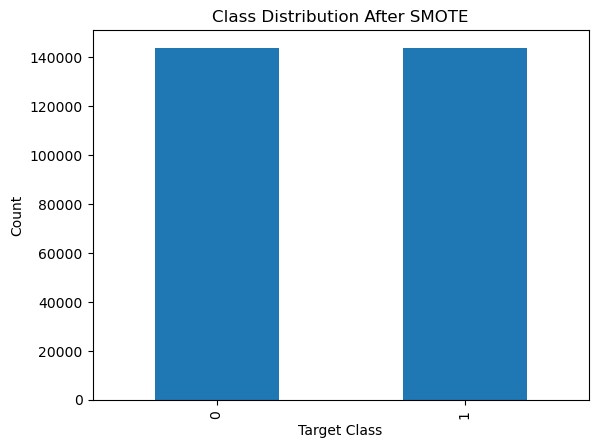

In [52]:
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


After applying SMOTE, both classes are equally represented, allowing the model to learn minority class patterns effectively.

## Model development, Predictions, Evaluation and Comparision

#### First we are trieng with logistic regression

In [30]:
lr_model = LogisticRegression(max_iter=1000, random_state=42,)
lr_model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_lr))

Accuracy : 0.78945
Precision: 0.29077946768060836
Recall   : 0.7609452736318408
F1 Score : 0.42077028885832185
ROC AUC  : 0.8583604974018182


#### We are trying with Random Forest classifier

In [20]:
rf_model = RandomForestClassifier(
    n_estimators=120,
    max_depth=14,
    min_samples_split=15,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=15,
                       n_estimators=120, n_jobs=-1, random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


In [36]:
y_pred_rf

array([0, 0, 0, ..., 0, 1, 1], shape=(40000,))

In [37]:
y_prob_rf

array([0.39906628, 0.39134955, 0.22395961, ..., 0.49926174, 0.65685445,
       0.52052181], shape=(40000,))

In [39]:
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))


Accuracy : 0.825175
Precision: 0.2223052493928638
Recall   : 0.2960199004975124
F1 Score : 0.25392083644510827
ROC AUC  : 0.6964291106999743


#### We are trying with Random Forest classifier

In [40]:
dt_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=42,
    min_samples_split=2, 
    min_samples_leaf=1
)

dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [44]:
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

In [45]:
y_pred_dt

array([1, 1, 0, ..., 1, 1, 1], shape=(40000,))

In [46]:
y_prob_dt

array([0.56716418, 0.51450677, 0.0312989 , ..., 0.73366802, 0.73366802,
       0.73366802], shape=(40000,))

In [47]:
print("Decision Tree Model Evaluation")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_dt))


Decision Tree Model Evaluation
Accuracy : 0.566925
Precision: 0.1225242608251518
Recall   : 0.5370646766169154
F1 Score : 0.199528672427337
ROC AUC  : 0.5695505034582506


## Model Comparison Table

In [56]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_dt)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_dt)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_dt)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_dt)
    ]
})
print("Model Comparison Table")
comparison

Model Comparison Table


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.789450,0.290779,0.760945,0.420770,0.858360
1,Random Forest,0.825175,0.222305,0.296020,0.253921,0.696429
2,Decision Tree,0.566925,0.122524,0.537065,0.199529,0.569551


### Model Comparison Summary

- **Logistic Regression** performed best with the highest **Recall (0.76)** and **ROC-AUC (0.86)**, making it suitable for identifying transaction customers in an imbalanced dataset.
- **Random Forest** achieved higher **Accuracy (0.83)** but showed low recall, indicating poor detection of minority class customers.
- **Decision Tree** showed the weakest performance with lower accuracy and ROC-AUC, suggesting overfitting and instability.

**Final Selection:** Logistic Regression was chosen as the final model due to its strong recall and ROC-AUC performance.


## Confusion matrix

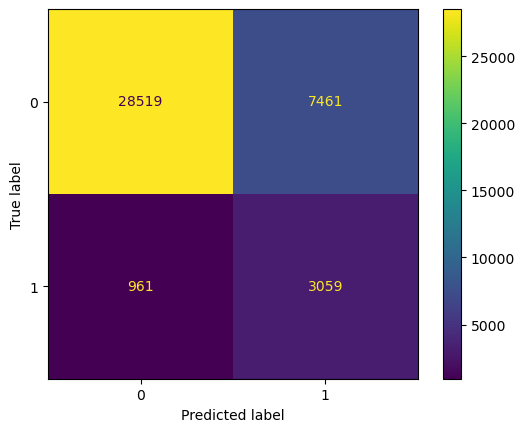

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Confusion Matrix Explanation

The confusion matrix summarizes the classification performance of the Logistic Regression model. The model correctly predicted **28,519 non-transaction customers (True Negatives)** and **3,059 transaction customers (True Positives)**, indicating good learning of both classes.

However, **7,461 False Positives** indicate cases where non-transaction customers were incorrectly predicted as transaction customers, while **961 False Negatives** represent missed transaction customers. In banking applications, false negatives are more critical because they result in missing potential customers. The relatively low number of false negatives shows that the model achieves strong recall, making it suitable for imbalanced transaction prediction tasks.


# Challenges Faced

- Features were anonymized, which limited domain-based interpretation and feature understanding.
- Training models on a large dataset increased computational time, especially after applying SMOTE.
- Selecting appropriate evaluation metrics was challenging due to class imbalance.

**Solutions Applied:**
- SMOTE was used to balance the training data.
- Ensemble and linear models were evaluated to handle anonymized features effectively.
- Model complexity was optimized to reduce training time.
- Recall, F1-score, and ROC-AUC were prioritized over accuracy.


# Conclusion

In this project, a supervised machine learning approach was used to predict customer transaction behavior in the banking domain. A complete data analysis was performed, and class imbalance was addressed using SMOTE. Multiple models were trained and compared using suitable evaluation metrics.

Among the evaluated models, **Logistic Regression** demonstrated the best performance in identifying potential transaction customers, achieving higher recall and ROC-AUC scores. From a business perspective, the model prioritizes recall over precision to ensure that potential transaction customers are not missed, even at the cost of predicting some non-transaction customers as positive.

